<img src="https://github.com/djp840/MSDS_453_Public/blob/main/images/NorthwesternHeader.png?raw=1">

## MSDS453 - Research Assignment 01 - First Vectorized Representation


Our goal in this exercise is to BEGIN coming to a common agreement, among this class, as to what terms we will use as we selectively refine our corpus-wide vocabulary. This corpus vocabulary is what would represent the content of each different document for clustering and classification purposes, which will be our next step. This means that we need to make decisions - what is in, what is out.

### Importing Packages

In [1]:
import pandas as pd
import os
import numpy as np
import re
import string
from packaging import version

from numpy import array
from numpy import argmax

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize 
from nltk.tokenize import RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import ngrams, FreqDist

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.manifold import MDS
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, silhouette_score
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
#from rake_nltk import Rake

import gensim
from gensim.models import Word2Vec,LdaMulticore, TfidfModel
from gensim import corpora
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

<div class="alert alert-block alert-danger">
<b>Gensim</b> is a Python library for topic modelling, document indexing and similarity retrieval with large corpora. Target audience is the natural language processing (NLP) and information retrieval (IR) community <br><br>
    <b>https://pypi.org/project/gensim/ </b>
</div>

In [2]:
import pkg_resources
pkg_resources.require("gensim<=3.8.3");

In [3]:
print("Genism Version: ", gensim.__version__)

Genism Version:  3.6.0


### NLTK Downloads

In [4]:
# Only run this once, they will be downloaded.
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [5]:
import warnings
warnings.filterwarnings('ignore')

### Create List of Stop Words from NLTK

In [6]:
stop_words = set(stopwords.words("english"))

### Mount Google Drive to Colab Environment

In [7]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### One-hot Encoding Example 

In [8]:
# define example
data = ['ginsburg', 'RBG', 'justice', 'ginsburg']
values = array(data)
print(values)
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
# invert first example
#print(onehot_encoded[0, :])
inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])])
#print(inverted)

['ginsburg' 'RBG' 'justice' 'ginsburg']
[1 0 2 1]
[[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


## NLP Data Functions

### Pre-process dataset to remove punctuation

In [9]:
def remove_punctuation(in_text):
    # Remove punctuation
    text = re.sub('[^a-zA-Z]', ' ', str(in_text))
    return text

### Pre-process dataset to lower case it

In [10]:
def lower_case(in_text):
    # Convert to lowercase
    text = in_text.lower()    
    return text

### Pre-process dataset to remove tags

In [11]:
def remove_tags(in_text):    
    # Remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",in_text)
    return text

### Pre-process dataset to remove special characters and digits

In [12]:

def remove_special_chars_and_digits(in_text):
    # Remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",in_text)
    return text


### Pre-process dataset to appy Stemming

In [13]:
def apply_stemming(in_text):
    stemmer=PorterStemmer()
    word_list = nltk.word_tokenize(in_text)
    output = ' '.join([stemmer.stem(w) for w in word_list])
    return output

### Pre-process dataset to apply Lemmatization

In [14]:
def apply_lemmatization(in_text):
    # Lemmatization
    lem = WordNetLemmatizer()
    word_list = nltk.word_tokenize(in_text)
    output = ' '.join([lem.lemmatize(w) for w in word_list])
    return output

### Remove stop words

In [15]:
def remove_stop_words(in_text):
    stop_words = set(stopwords.words('english')) 
    word_tokens = word_tokenize(in_text)  
    filtered_sentence = [w for w in word_tokens if not w in stop_words] 
#     filtered_sentence = [] 
#     for w in word_tokens: 
#         if w not in stop_words: 
#             filtered_sentence.append(w) 

    return filtered_sentence

### Run Phase Machine

In [16]:
def run_phrase_machine(in_text):
    phrases=phrasemachine.get_phrases(in_text)
    return phrases

### Run Rake Keyword Extractor

In [17]:
def run_rake(in_text):
    r = Rake()
    r.extract_keywords_from_text(in_text)
    rake_phrases= r.get_ranked_phrases()
    return rake_phrases

### Run NLTK Tokenizer

In [18]:
def run_nltk_tokenizer(in_text):
    tokens=nltk.word_tokenize(in_text)
    return tokens

### Run NLTK Sentence Tokenizer

In [19]:
def run_nltk_sent_tokenizer(in_corpus):
    sents = nltk.sent_tokenize(in_corpus)
    return sents

### Run word-ngram Tokenizer

In [20]:
def run_nltk_tokenizer_word_ngrams(in_text, ngram_size):
    n_grams = ngrams(nltk.word_tokenize(in_text), ngram_size)
    return [ ' '.join(grams) for grams in n_grams]

### Get Frequency Distribution 

In [21]:
def get_freq_dist(terms):
    all_counts = dict()
    all_counts[size] = FreqDist(terms)
    return all_counts

### Processing Text into Lists

In [22]:
def get_corpus(path_to_file):
    #read in class corpus csv into python
    data=pd.read_csv(path_to_file)

    #create empty list to store text documents titles
    titles=[]
    docids=[]
    #for loop which appends the DSI title to the titles list
    for i in range(0,len(data)):
        docids.append(data['Doc_ID'].iloc[i])

    #for loop which appends the DSI title to the titles list
    for i in range(0,len(data)):
        titles.append(data['DSI_Title'].iloc[i])

    #create empty list to store text documents
    text_body=[]

    #for loop which appends the text to the text_body list
    for i in range(0,len(data)):
        temp_text=data['Text'].iloc[i]
        temp_text=clean_doc(temp_text)
        temp_text = ' '.join(map(str, temp_text))
        text_body.append(temp_text)
    return (docids,titles,text_body)

#  <font color='red'> methods3 for data wragling remove punctuation,stop words ,lemitization, lower and remove non alphabets

# function for data wrangling 

In [23]:
# method 3 remove punctutaion  , stopwords and lemetization, lower and keep character


def clean_doc(doc): 
    
    
    
    doc= remove_punctuation(doc)
    doc = lower_case(doc)
    #remove stop word
    doc = ' '.join(remove_stop_words(doc))
    #apply lemitization
    doc = apply_lemmatization(doc)
    #apply stemming
    #doc = apply_stemming(doc)
    #split document into individual words
    tokens= doc.split()   
    #tokens = list(filter(None, doc))
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    #remove remaining tokens that are not alphabetic
   

    #remove punctuation from each word
    tokens = [re_punc.sub('', w) for w in tokens]
    tokens = [word for word in tokens if word.isalpha()]
    tokens = [word.lower() for word in tokens]

    return tokens

In [24]:
# def process_corpus(data):
        
#     #create empty list to store text documents titles
#     titles=[]
    
#     #for loop which appends the DSI title to the titles list
#     for i in range(0,len(data)):
#         temp_text=data['DSI_Title'].iloc[i]
#         titles.append(temp_text)
    
#     #create empty list to store text documents
#     text_body=[]
    
#     #for loop which appends the text to the text_body list
#     for i in range(0,len(data)):
#         temp_text=data['Text'].iloc[i]
#         text_body.append(temp_text)
    
#     #Note: the text_body is the unprocessed list of documents read directly form 
#     #the csv.
        
#     #empty list to store processed documents
#     processed_text=[]
#     #for loop to process the text to the processed_text list
#     for i in text_body:
#         text=clean_doc(i)
#         processed_text.append(text)
    
#     #Note: the processed_text is the PROCESSED list of documents read directly form 
#     #the csv.  Note the list of words is separated by commas.
    
    
#     #stitch back together individual words to reform body of text
#     final_processed_text=[]
    
#     for i in processed_text:
#         temp_DSI=i[0]
#         for k in range(1,len(i)):
#             temp_DSI=temp_DSI+' '+i[k]
#         final_processed_text.append(temp_DSI)
    
#     return titles, final_processed_text, processed_text

#  <font color='red'> Functions to get  word2vec, doc2vec and  visualize documents

In [25]:
# def clean_doc(doc): 
#     #split document into individual words
#     doc = ' '.join(remove_stop_words(doc))
#     doc = apply_lemmatization(doc)

#     tokens=doc.split()
#     re_punc = re.compile('[%s]' % re.escape(string.punctuation))
#     # remove punctuation from each word
#     tokens = [re_punc.sub('', w) for w in tokens]
#     # remove remaining tokens that are not alphabetic
#     tokens = [word for word in tokens if word.isalpha()]
#     # filter out short tokens
#     tokens = [word for word in tokens if len(word) > 4]
#     #lowercase all words
#     tokens = [word.lower() for word in tokens]
    
#     return tokens

def process_corpus(data):
        
    #create empty list to store text documents titles
    titles=[]
    
    #for loop which appends the DSI title to the titles list
    for i in range(0,len(data)):
        temp_text=data['DSI_Title'].iloc[i]
        titles.append(temp_text)
    
    #create empty list to store text documents
    text_body=[]
    
    #for loop which appends the text to the text_body list
    for i in range(0,len(data)):
        temp_text=data['Text'].iloc[i]
        text_body.append(temp_text)
    
    #Note: the text_body is the unprocessed list of documents read directly form 
    #the csv.
        
    #empty list to store processed documents
    processed_text=[]
    #for loop to process the text to the processed_text list
    for i in text_body:
        text=clean_doc(i)
        processed_text.append(text)
    
    #Note: the processed_text is the PROCESSED list of documents read directly form 
    #the csv.  Note the list of words is separated by commas.
    
    
    #stitch back together individual words to reform body of text
    final_processed_text=[]
    
    for i in processed_text:
        temp_DSI=i[0]
        for k in range(1,len(i)):
            temp_DSI=temp_DSI+' '+i[k]
        final_processed_text.append(temp_DSI)
    
    return titles, final_processed_text, processed_text

def run_doc2vec(final_processed_text, processed_text):
    #create doc2vec matrix
    documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(final_processed_text)]
    model = Doc2Vec(documents, vector_size=300, window=3, min_count=2, workers=4)    
    
    doc2vec_df=pd.DataFrame()
    for i in range(0,len(processed_text)):
        vector=pd.DataFrame(model.infer_vector(processed_text[i])).transpose()
        doc2vec_df=pd.concat([doc2vec_df,vector], axis=0)
        
    return doc2vec_df

def run_word2vec(processed_text):

    #word to vec model
    model_w2v = Word2Vec(processed_text, size=300, window=3, min_count=2, workers=4)
    
    labels = []
    tokens = []

    for word in model_w2v.wv.vocab:
        tokens.append(model_w2v[word])
        labels.append(word)
    
    
    return labels, tokens, model_w2v





def plot_doc2vec(doc2vec_df, titles,_perplexity=10):
    #visualize documents through applying TSNE to doc2vec matrix
    tsne_model = TSNE(perplexity=_perplexity, n_components=2, init='pca', n_iter=2500, random_state=23)
    doc2vec_df = tsne_model.fit_transform(doc2vec_df)
    x = []
    y = []
    for value in doc2vec_df:
        x.append(value[0])
        y.append(value[1])

    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(titles[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()
    

def plot_word2vec(model, labels, tokens, _perplexity=30):
    "Creates and TSNE model and plots it"
    words = []
    embeddings = []
    for word in list(model.wv.vocab):
        embeddings.append(model.wv[word])
        words.append(word)
    pca = PCA(n_components=2).fit(tokens)
    X_pca = pca.transform(tokens)

    tsne_model= TSNE(perplexity=_perplexity, n_components=2, init='pca', n_iter=3500, random_state=32)
    new_values = tsne_model.fit_transform(X_pca)
    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(40, 40)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

    

### Processing Text into Lists for tfidf

In [26]:
def get_corpus(path_to_file):
    #read in class corpus csv into python
    data=pd.read_csv(path_to_file)

    #create empty list to store text documents titles
    titles=[]
    docids=[]
    #for loop which appends the DSI title to the titles list
    for i in range(0,len(data)):
        docids.append(data['Doc_ID'].iloc[i])

    #for loop which appends the DSI title to the titles list
    for i in range(0,len(data)):
        titles.append(data['DSI_Title'].iloc[i])

    #create empty list to store text documents
    text_body=[]

    #for loop which appends the text to the text_body list
    for i in range(0,len(data)):
        temp_text=data['Text'].iloc[i]
        temp_text=clean_doc(temp_text)
        temp_text = ' '.join(map(str, temp_text))
        text_body.append(temp_text)
    return (docids,titles,text_body)

### Source Class Corpus  

In [27]:
path_to_file='/content/gdrive/MyDrive/input/Class_Corpus_v2.csv'
docids,titles,text=get_corpus(path_to_file)


In [28]:
# vectorizer = CountVectorizer(ngram_range = (1,1))
# matrix=vectorizer.fit_transform(text) 

In [29]:
#vectorizer.get_feature_names()

### Retreive Word Count Frequencies 

In [30]:
vectorizer = CountVectorizer(ngram_range = (1,1))
matrix=vectorizer.fit_transform(text)     

#creating datafram from TFIDF Matrix
words = vectorizer.get_feature_names()
matrix=pd.DataFrame(matrix.toarray(), columns=words, index=titles)
frequencies = matrix.sum().transpose().reset_index()
frequencies.columns = ['word', 'counts']
frequencies.sort_values("counts",ascending = False , inplace =True)
frequencies.head(10)

,word,counts
5197,film,1165
8880,movie,1026
9411,one,808
7910,like,667
13899,time,458
2164,character,424
8225,make,414
5761,get,412
13081,story,361
4742,even,355


In [31]:
frequencies.shape

(15479, 2)

### Calculates TFIDF and Saves TFIDF Values for Terms 

Output Directory Pathway - Update to Environment

In [32]:
vectorizer = TfidfVectorizer( use_idf=True, norm=None)
transformed_documents = vectorizer.fit_transform(text)
transformed_documents_as_array = transformed_documents.toarray()

####################################################################################
# NOTE THIS SAVE A FILE FOR EACH DOCUMENT TO YOUR HARD DRIVE
# It first creates a directory called td_idf_output
# Then for each document it will generate a file with the words and tf idf scores
###################################################################################
# output_dir ="C:\\Users\\hag8665\\Desktop\\MSDS 453\\Assignment_1\\output"

# import os
# if not os.path.exists(output_dir):
#     os.makedirs(output_dir)

# for counter, doc in enumerate(transformed_documents_as_array):
#     # construct a dataframe
#     tf_idf_tuples = list(zip(vectorizer.get_feature_names(), doc))
#     one_doc_as_df = pd.DataFrame.from_records(tf_idf_tuples
#                                               ,columns=['term', 'score']).sort_values(by='score', ascending=False).reset_index(drop=True)

#     # output to a csv using the enumerated value for the filename
#     one_doc_as_df.to_csv(output_dir+"/"+str(titles[counter]))
    


# get count and mean tfidf scors

In [33]:
words_tfidf = vectorizer.get_feature_names()
matrix_tfidf=pd.DataFrame(transformed_documents.toarray(), columns=words_tfidf, index=titles)

In [34]:
meantfidf = matrix_tfidf.mean().transpose().reset_index()
meantfidf.columns = ['word', 'counts']
meantfidf.sort_values("counts",ascending = False , inplace =True)
meantfidf.head(10)

,word,counts
5197,film,5.276811
8880,movie,4.938195
9411,one,3.586873
7910,like,3.133032
1521,bond,3.007107
3182,cruella,2.853147
13899,time,2.373419
5025,family,2.350925
2164,character,2.300459
5761,get,2.225977


# top 10 tfidf mean highest scores

In [35]:

frequenciestfidf = matrix_tfidf.mean().transpose().reset_index()
frequenciestfidf.columns = ['word', 'mean_tfidf_score']
frequenciestfidf.sort_values("mean_tfidf_score",ascending = False , inplace =True)
frequenciestfidf.head(10).round(3).reset_index()

,index,word,mean_tfidf_score
0,5197,film,5.277
1,8880,movie,4.938
2,9411,one,3.587
3,7910,like,3.133
4,1521,bond,3.007
5,3182,cruella,2.853
6,13899,time,2.373
7,5025,family,2.351
8,2164,character,2.300
9,5761,get,2.226


# finding scores for labels in step 1

In [36]:
step1_list = [ 'Frozen 2',
              'Elsa',
             'Anna',
            'Kristoff',
            'Sven',
            'Olaf',
            'Josh Gad',
            'Kristen Bell',
            'Jonathan Groff',
            'Idina Menzel',
            'spectacular',
            'sweet spot' ,
            'fun',
            'cash grab',
            'warm',
            'disappointed',
            'bored',
            'joy',
              'lackluster',
              'sweet',
              'jaded',
              'enjoy',
              'Menzel',
              'disappointed',
              'abhorent',
              'sequel'
            'entertain',
             'Frozen',
             'comedy',
             'surprising',
             'underwhelmed','dazzling', 'pleasant']


In [37]:
#step1_list +[item.lower() for item in step1_list]

In [38]:
frequenciestfidf.loc[frequenciestfidf['word'].isin(step1_list +[item.lower() for item in step1_list])].round(3).reset_index()

,index,word,mean_tfidf_score
0,5580,frozen,1.179
1,5604,fun,1.037
2,4411,elsa,1.010
3,2582,comedy,0.952
4,552,anna,0.729
5,4559,enjoy,0.358
6,12746,spectacular,0.299
7,13468,sweet,0.293
8,7669,kristoff,0.282
9,9391,olaf,0.248


In [39]:
# DATA FRAME SHOWS THE TFIDF SCORES FOR ALL THE WORDS FOR EACH DOCUMENT

In [40]:
matrix_tfidf.apply(lambda x: x.sort_values(ascending =False).values)

,aaah,abaire,abandon,abandoned,abandoning,abandonment,abashed,abbey,abby,abducted,abduction,abdul,abel,aberrance,abetted,abhorrent,abide,ability,abject,abkarian,able,ably,abnett,abnormality,aboard,abode,abomination,abort,abound,abounding,aboveground,abrams,abrupt,abruptly,absconds,absence,absent,absolute,absolutely,absorbed,...,zamora,zany,zapped,zarathustra,zealand,zealander,zealot,zeitgeist,zeitgeistiness,zelda,zemeckis,zemeckiss,zemo,zen,zenith,zero,zeta,zig,ziggy,zimmer,zimmerman,zing,zinger,zion,zip,zipatone,zipping,zippy,zissis,zissou,zoe,zog,zombie,zombified,zone,zoom,zoomy,zootopia,zora,zorro
HAG_Doc1_Frozen2,5.828314,9.151102,9.459403,4.442019,5.422849,4.912023,5.828314,5.828314,5.828314,8.884039,5.828314,5.828314,5.828314,5.828314,5.828314,5.828314,5.828314,6.378513,5.828314,5.828314,6.049907,9.824046,5.135167,5.828314,5.828314,4.729701,5.828314,5.828314,5.135167,5.828314,5.828314,4.912023,5.828314,5.828314,5.422849,4.442019,4.575551,5.422849,11.647211,5.135167,...,5.828314,5.828314,5.828314,5.828314,5.828314,5.828314,5.828314,10.845697,5.828314,4.912023,5.828314,5.828314,5.828314,5.422849,5.828314,8.884039,5.828314,5.422849,5.828314,8.247131,11.656627,5.828314,5.135167,5.828314,5.828314,5.828314,5.828314,5.422849,5.422849,5.828314,4.324236,5.828314,9.151102,5.828314,3.956512,4.912023,5.828314,5.135167,4.575551,10.845697
HAG_Doc2_Frozen2,0.000000,4.575551,4.729701,4.442019,5.422849,4.912023,0.000000,0.000000,0.000000,4.442019,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.378513,0.000000,0.000000,6.049907,4.912023,5.135167,0.000000,0.000000,4.729701,0.000000,0.000000,5.135167,0.000000,0.000000,4.912023,0.000000,0.000000,5.422849,4.442019,4.575551,5.422849,7.764807,5.135167,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.422849,0.000000,4.912023,0.000000,0.000000,0.000000,5.422849,0.000000,4.442019,0.000000,5.422849,0.000000,8.247131,0.000000,0.000000,5.135167,0.000000,0.000000,0.000000,0.000000,5.422849,5.422849,0.000000,4.324236,0.000000,4.575551,0.000000,3.956512,4.912023,0.000000,5.135167,4.575551,5.422849
HAG_Doc3_Frozen2,0.000000,4.575551,4.729701,4.442019,0.000000,4.912023,0.000000,0.000000,0.000000,4.442019,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.378513,0.000000,0.000000,6.049907,4.912023,5.135167,0.000000,0.000000,4.729701,0.000000,0.000000,5.135167,0.000000,0.000000,4.912023,0.000000,0.000000,0.000000,4.442019,4.575551,0.000000,3.882404,5.135167,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.912023,0.000000,0.000000,0.000000,0.000000,0.000000,4.442019,0.000000,0.000000,0.000000,4.123566,0.000000,0.000000,5.135167,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.324236,0.000000,4.575551,0.000000,3.956512,4.912023,0.000000,5.135167,4.575551,0.000000
HAG_Doc4_Frozen2,0.000000,4.575551,4.729701,4.442019,0.000000,4.912023,0.000000,0.000000,0.000000,4.442019,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.189256,0.000000,0.000000,6.049907,4.912023,0.000000,0.000000,0.000000,4.729701,0.000000,0.000000,0.000000,0.000000,0.000000,4.912023,0.000000,0.000000,0.000000,4.442019,4.575551,0.000000,3.882404,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.912023,0.000000,0.000000,0.000000,0.000000,0.000000,4.442019,0.000000,0.000000,0.000000,4.123566,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.324236,0.000000,4.575551,0.000000,3.956512,4.912023,0.000000,0.000000,4.575551,0.000000
HAG_Doc5_Frozen2,0.000000,4.575551,4.729701,4.442019,0.000000,0.000000,0.000000,0.000000,0.000000,4.442019,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.189256,0.000000,0.000000,3.024953,0.000000,0.000000,0.000000,0.000000,4.729701,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.442019,4.575551,0.000000,3.882404,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000

In [41]:
data = pd.read_csv(path_to_file)

### Create Word and Document Embedding

In [42]:
#cleans text to get processed text
titles, final_processed_text, processed_text = process_corpus(data)




# <font color='red'> method word2vec =300

In [43]:
#word to vec
model_w2v = Word2Vec(processed_text, size=300, window=5, min_count=1, workers=4)

#join all processed DSI words into single list
processed_text_w2v=[]
for i in processed_text:
    for k in i:
        processed_text_w2v.append(k)


In [44]:

#obtian all the unique words from DSI
w2v_words=list(set(processed_text_w2v))

#can also use the get_feature_names() from TFIDF to get the list of words
#w2v_words=Tfidf.get_feature_names()

#empty dictionary to store words with vectors
w2v_vectors={}

#for loop to obtain weights for each word
for i in w2v_words:
    temp_vec=model_w2v.wv[i]
    w2v_vectors[i]=temp_vec

#create a final dataframe to view word vectors
w2v_df=pd.DataFrame(w2v_vectors).transpose()

w2v_df.T.mean().sort_values( ascending = False)

sooner        0.000121
kink          0.000116
citizen       0.000104
noteworthy    0.000102
steer         0.000090
                ...   
character    -0.027406
one          -0.027815
movie        -0.027883
like         -0.028564
film         -0.030507
Length: 15498, dtype: float32

In [45]:
len(w2v_vectors)

15498

#   <font color='red'> method doc2vec is 300 

### Create Doc2Vec Embedding

In [46]:
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(final_processed_text)]
model = Doc2Vec(documents, vector_size=300, window=2, min_count=1, workers=4)

doc2vec_df=pd.DataFrame()
for i in range(0,len(processed_text)):
    vector=pd.DataFrame(model.infer_vector(processed_text[i])).transpose()
    doc2vec_df=pd.concat([doc2vec_df,vector], axis=0)

doc2vec_df=doc2vec_df.reset_index()

doc_titles={'title': titles}
t=pd.DataFrame(doc_titles)

doc2vec_df=pd.concat([t, doc2vec_df], axis=1)

doc2vec_df=doc2vec_df.drop('index', axis=1)

doc2vec_df.head(10)

,title,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
0,HAG_Doc1_Frozen2,0.000529,-0.001363,-0.000112,-0.000695,-0.001450,0.000681,0.000904,-0.000307,0.001303,0.000019,-0.000998,-0.000355,0.000613,0.000356,0.001410,0.000826,-0.000128,0.000450,0.000181,0.000471,-0.000515,0.001358,0.001054,-0.001278,-0.000982,0.000626,0.001121,-0.000481,0.000119,-0.000570,0.000375,0.000110,0.000317,0.001544,-0.000826,0.000882,0.000372,-0.000421,-0.001008,...,-0.001125,-0.001661,0.001010,-0.000497,-0.000013,-0.001196,-0.000711,-0.000673,-0.001647,0.001514,0.001406,0.001440,-0.000325,-0.001496,0.000646,0.000757,-0.001088,-0.000426,0.001207,-0.000925,-0.001065,0.000348,0.000439,-0.001633,-0.001174,-0.000743,0.000249,-0.000184,0.000469,0.001033,-0.001239,-0.000114,0.001069,0.000870,0.001010,-0.000388,-0.000166,-0.000703,0.000741,0.001619
1,HAG_Doc2_Frozen2,-0.001097,-0.001229,0.001370,0.000874,-0.000224,-0.000733,0.001663,-0.001443,-0.001011,0.000252,-0.001428,0.000499,-0.001358,-0.000724,-0.001205,-0.000475,-0.000783,-0.000880,0.000969,0.001026,0.001215,0.001490,0.000608,-0.000934,-0.001032,0.001130,-0.000772,-0.000752,-0.000817,0.001246,0.001362,0.000796,0.000548,0.001337,-0.001212,-0.000153,0.000996,0.000946,0.001438,...,0.000296,0.001305,0.000675,0.001488,-0.001204,0.001320,-0.001115,-0.001470,-0.000783,-0.001611,-0.001523,-0.000509,0.001482,0.001004,-0.001318,-0.000524,-0.001376,0.000781,-0.001001,0.000330,-0.000721,-0.000375,-0.000033,0.000730,0.001239,0.000500,0.000341,-0.001640,-0.001185,0.001650,0.000691,0.000980,0.001343,-0.000992,-0.000830,0.000727,0.001223,0.000018,0.000916,0.001168
2,HAG_Doc3_Frozen2,-0.014410,-0.004505,-0.003395,-0.002134,-0.006617,0.003258,-0.015755,0.013088,-0.001689,0.007403,0.007387,0.007523,0.014270,0.004393,0.001367,-0.010498,0.016294,-0.013841,0.028026,-0.000615,-0.018685,0.018870,-0.016281,0.000249,0.013995,0.013555,0.011047,0.014647,0.006301,0.021407,0.017120,-0.016185,0.000314,-0.005656,-0.017187,0.012844,0.001447,0.003727,0.003357,...,-0.014292,0.007806,0.004894,0.010880,-0.008441,0.001098,-0.007592,-0.012291,0.029308,-0.008708,0.000895,-0.009075,-0.017088,0.011059,0.001714,0.003452,0.023859,0.013133,-0.009666,-0.035027,-0.004608,-0.008285,0.001673,-0.010335,0.004393,-0.012203,0.012258,-0.016978,0.009507,0.011587,0.023524,0.009823,-0.011975,0.026423,0.009349,0.003399,0.004747,-0.011705,-0.002967,0.011815
3,HAG_Doc4_Frozen2,-0.000117,-0.001299,0.001490,0.001607,0.000523,-0.000661,-0.001481,0.001475,-0.001433,0.001540,-0.001654,-0.001054,0.001193,-0.000426,-0.000498,0.001375,0.001132,-0.000042,0.000207,0.001411,-0.001524,-0.000466,0.000003,0.001524,0.001354,-0.000446,0.001250,-0.000064,0.000989,0.000743,-0.000156,0.000018,0.000828,-0.001601,0.000491,-0.001168,-0.001325,-0.001081,0.000732,...,0.000803,-0.000018,0.001040,0.000745,-0.000941,0.000778,-0.000921,-0.001270,0.000980,0.000704,0.001325,0.000975,-0.001575,0.000266,0.000326,0.000355,-0.001551,-0.000019,-0.000695,-0.000855,-0.001545,-0.000178,0.000174,-0.001100,0.000456,0.001232,0.000204,-0.000847,-0.000897,-0.001023,-0.001339,-0.000496,-0.001189,-0.000163,-0.000422,0.000808,-0.000281,0.000222,-0.001553,-0.000131
4,HAG_Doc5_Frozen2,-0.007055,-0.002567,-0.005043,-0.003163,-0.002551,0.003929,-0.009539,0.008426,-0.000871,0.002410,0.000894,0.003775,0.005207,0.000723,-0.000140,-0.006717,0.007666,-0.007210,0.015229,-0.004761,-0.013017,0.011454,-0.008966,-0.000765,0.006146,0.006230,0.004871,0.008078,0.000296,0.013313,0.013007,-0.009112,0.003940,-0.008052,-0.011282,0.010006,0.001343,0.003683,0.002720,...,-0.007028,0.002162,0.002021,0.008988,-0.003965,0.000680,-0.003916,-0.008932,0.017029,-0.006090,-0.002766,-0.002268,-0.007392,0.001664,0.000388,0.002069,0.012053,0.005434,-0.006486,-0.018533,-0.000984,-0.003208,0.001496,-0.002941,0.003493,-0.004

In [47]:
len(processed_text[248])

445

### Explore K-means clustering of TFIDF matrix

In [199]:
#############################################
#Calculates tf idf
#Edit ngram range if you like
#############################################
def tfidf(corpus, titles, ngram_range = (1,1)):
    #this is a function to created the tfidf matrix
    Tfidf=TfidfVectorizer(stop_words='english', ngram_range = ngram_range)

    #fit the vectorizer using final processed documents.  The vectorizer requires the 
    #stiched back together document.

    TFIDF_matrix=Tfidf.fit_transform(corpus)     

    #creating datafram from TFIDF Matrix
    words = Tfidf.get_feature_names()
    matrix=pd.DataFrame(TFIDF_matrix.toarray(), columns=Tfidf.get_feature_names(), index=titles)
    return matrix, words

#############################################
#Performs the k-means clustering of the tfidf matrix
#Edit the number of clusters
#############################################
def k_means_tfidf(tfidf_matrix,terms,titles,final_processed_text, k=25):
    
    #this is a function to generate the k-means output using the tfidf matrix.  Inputs 
    #to the function include: titles of text, processed text, and desired k value. 
    km = KMeans(n_clusters=k, random_state =89)
    km = km.fit(tfidf_matrix)
    clusters = km.labels_.tolist()

    Dictionary={'Doc Name':titles, 'Cluster':clusters,  'Text': final_processed_text}
    frame=pd.DataFrame(Dictionary, columns=['Cluster', 'Doc Name','Text'])

    print("Top terms per cluster:")
    #sort cluster centers by proximity to centroid
    order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

    terms_dict=[]


    #save the terms for each cluster and document to dictionaries.  To be used later
    #for plotting output.

    #dictionary to store terms and titles
    cluster_terms={}
    cluster_title={}


    for i in range(k):
        #print("Cluster %d:" % i),
        temp_terms=[]
        temp_titles=[]
        for ind in order_centroids[i, :10]:
            #print(' %s' % terms[ind])
            terms_dict.append(terms[ind])
            temp_terms.append(terms[ind])
        cluster_terms[i]=temp_terms

        
        #print("Cluster %d titles:" % i, end='')
        temp=frame[frame['Cluster']==i]
        for title in temp['Doc Name']:
            #print(' %s,' % title, end='')
            temp_titles.append(title)
        cluster_title[i]=temp_titles
    return km, cluster_title 

#############################################
# Run the code
#############################################


In [200]:
tfidf_matrix, terms = tfidf(final_processed_text, titles)
k_tfidfmeans_model, clustertfidf_title = k_means_tfidf(tfidf_matrix,terms,titles,final_processed_text, k=25)

Top terms per cluster:


### Implementation of Silhouette Score 
Measurement most optimal number of clusters

In [203]:
k_list = [2, 5, 7, 10, 15,20,25,30,35]
#silhoutte score list
sil_scores = []

for k in k_list:
    km = KMeans(n_clusters=k, random_state =89)
    km.fit(tfidf_matrix)
    labels = km.labels_.tolist()
    score = silhouette_score(tfidf_matrix, labels)
    sil_scores.append(score)

### Plot Silhouette Scores

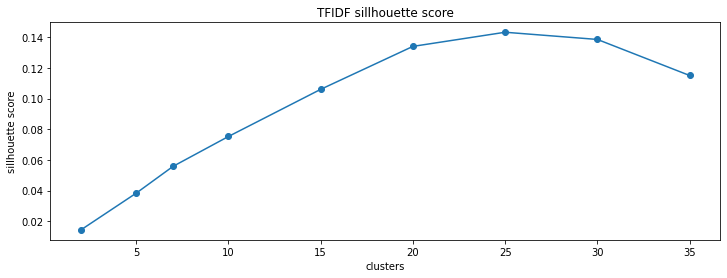

In [204]:
plt.figure(figsize=(12, 4))
plt.scatter(k_list, sil_scores)
plt.plot(k_list, sil_scores)
plt.xlabel("clusters")
plt.ylabel("sillhouette score")
plt.title("TFIDF sillhouette score")
plt.show()

# Elbow Method

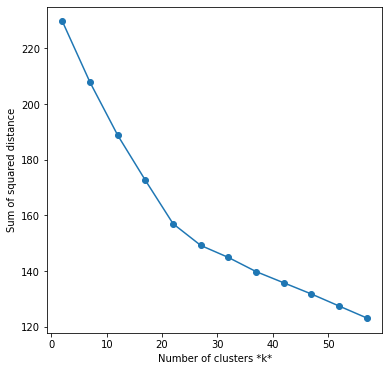

In [52]:

# Run the Kmeans algorithm and get the index of data points clusters
sse = []
list_k = list(range(2, 60,5))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(tfidf_matrix)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

In [53]:
#tfidf_matrix.reset_index(drop=True, inplace=True)

In [54]:
X= tfidf_matrix.values


In [55]:
y_kmeans = k_tfidfmeans_model.predict(tfidf_matrix)

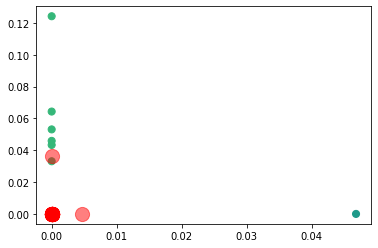

In [56]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = k_tfidfmeans_model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);

In [57]:
labels = k_tfidfmeans_model.labels_.tolist()

In [58]:
from sklearn.decomposition import PCA
def get_cluster_scatter_plot(X, kmeans_model, kmeans_labels, title):
    pca = PCA(n_components=2).fit(X)
    datapoint = pca.transform(X)

    plt.figure(figsize=(10, 6))
    label1 =    ['#be254a', '#dc484c', '#ef6645', '#f88c51', '#fdb365', '#fed27f', '#feeb9d', '#fffebe', 
'#f0f9a7', '#d8ef9b', '#b3e0a2', '#89d0a4', '#60bba8', '#3f97b7', '#4273b3', '#be254a', '#dc484c', '#ef6645', '#f88c51', '#fdb365', '#fed27f', '#feeb9d', '#fffebe', 
'#f0f9a7', '#d8ef9b', '#b3e0a2', '#89d0a4', '#60bba8', '#3f97b7', '#4273b3']#, "#0000FF"]
    # ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000000']#, "#0000FF"]


    color = [label1[i] for i in kmeans_labels]
    scatter = plt.scatter(datapoint[:, 0], datapoint[:, 1], c=color)

    centroids = kmeans_model.cluster_centers_
    centroidpoint = pca.transform(centroids)
    plt.scatter(centroidpoint[:, 0], centroidpoint[:, 1], marker='^', s=150, c='#000000')
    plt.title(title + ' PCA Cluster Plot')
    plt.show()

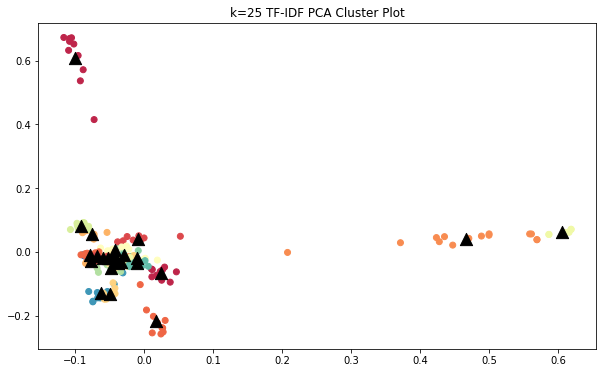

In [59]:
get_cluster_scatter_plot(X, k_tfidfmeans_model, labels,'k=25 TF-IDF' )

In [60]:
cluter = data['Movie Title'].to_list()

In [61]:
from sklearn.metrics import pairwise_distances
dist = pairwise_distances(X)

In [62]:
mds = MDS(n_components=25, dissimilarity="precomputed", random_state=1)

dist = 1 - cosine_similarity(tfidf_matrix)

datapoint = mds.fit_transform(dist)  # shape (n_components, n_samples)


In [63]:


pca = PCA(n_components=2).fit(X)
datapoint = pca.transform(X)
#datapoint = pd.DataFrame(datapoint)
#data[['Movie Title']]  + datapoint



Text(0.5, 1.0, 'K means K= 25')

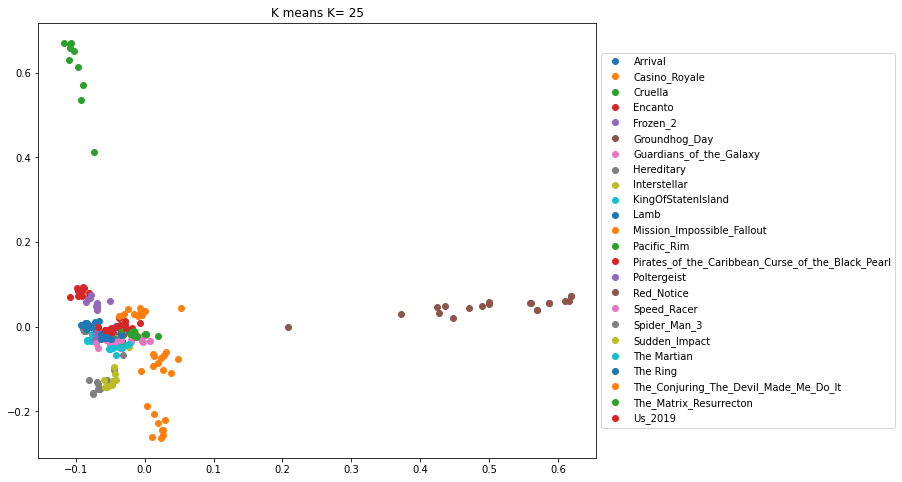

In [197]:

xs, ys = datapoint[:, 0], datapoint[:, 1]

df = pd.DataFrame(dict(x=xs, y=ys, label=cluter, title=range(0,len(cluter)))) 

df.head()

groups = df.groupby('label')

for name, group in groups:
    plt.plot(group["x"], group["y"], marker="o", linestyle="", label=name)
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5))
plt.title("K means K= 25")

In [65]:
colorize = dict(c=X[:, 0], cmap=plt.cm.get_cmap('rainbow', 5))

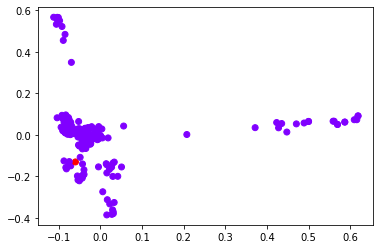

In [66]:
plt.scatter(datapoint[:, 0], datapoint[:, 1], **colorize)

In [67]:
from sklearn.metrics import homogeneity_score


In [69]:
kmeans = KMeans(n_clusters=25)
  
# Training the clustering model
kmeans.fit(X)
  
# Storing the predicted Clustering labels
y = kmeans.predict(X)

# Evaluating the performance
homogeneity_score(data["Movie Title"], y)

0.979056970842653

In [70]:
datak = data[["Movie Title"]].copy()

In [71]:
datak = datak.assign(cluster= y)

In [72]:
datak.groupby(["cluster","Movie Title"]).apply(lambda x: x.reset_index(drop=True)).to_excel("moviecluster.xlsx")

In [73]:
from tabulate import tabulate

print(tabulate(datak.groupby(["cluster","Movie Title"]).count().reset_index(), headers = "keys",tablefmt= 'fancy_grid'))

╒════╤═══════════╤═══════════════════════════════════════════════════╕
│    │   cluster │ Movie Title                                       │
╞════╪═══════════╪═══════════════════════════════════════════════════╡
│  0 │         0 │ Guardians_of_the_Galaxy                           │
├────┼───────────┼───────────────────────────────────────────────────┤
│  1 │         1 │ The_Conjuring_The_Devil_Made_Me_Do_It             │
├────┼───────────┼───────────────────────────────────────────────────┤
│  2 │         2 │ Red_Notice                                        │
├────┼───────────┼───────────────────────────────────────────────────┤
│  3 │         3 │ Poltergeist                                       │
├────┼───────────┼───────────────────────────────────────────────────┤
│  4 │         4 │ Casino_Royale                                     │
├────┼───────────┼───────────────────────────────────────────────────┤
│  5 │         5 │ Speed_Racer                                       │
├────┼

In [74]:
datak.groupby(["cluster","Movie Title"]).count().reset_index()

,cluster,Movie Title
0,0,Guardians_of_the_Galaxy
1,1,The_Conjuring_The_Devil_Made_Me_Do_It
2,2,Red_Notice
3,3,Poltergeist
4,4,Casino_Royale
5,5,Speed_Racer
6,6,KingOfStatenIsland
7,7,Frozen_2
8,8,The Ring
9,9,Groundhog_Day


In [75]:
data.columns

Index(['Doc_ID', 'DSI_Title', 'Text', 'Submission File Name', 'Student Name',
       'Genre of Movie', 'Review Type (pos or neg)', 'Movie Title'],
      dtype='object')

In [76]:
pip install scikit-plot

In [77]:
import scikitplot as skplt

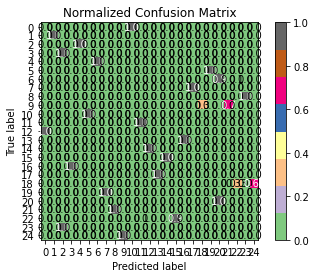

In [78]:
skplt.metrics.plot_confusion_matrix(labels,y,normalize=True, cmap ='Accent' )

### Explore K-means clustering of doc2vec matrix

In [218]:
def doc2vec_with_titles(corpus, processed_text, titles, vector_size = 300):
    #function to created doc2vec matrix
    documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(corpus)]

    model = Doc2Vec(documents, vector_size=vector_size, window=3, min_count=2, workers=4)

    doc2vec_df=pd.DataFrame()
    for i in range(0,len(processed_text)):
        vector=pd.DataFrame(model.infer_vector(processed_text[i])).transpose()
        doc2vec_df=pd.concat([doc2vec_df,vector], axis=0)

    doc2vec_df=doc2vec_df.reset_index()

    doc_titles={'title': titles}
    t=pd.DataFrame(doc_titles)

    doc2vec_df=pd.concat([doc2vec_df,t], axis=1)

    doc2vec_df=doc2vec_df.drop('index', axis=1)
    return doc2vec_df

def k_means_doc2vec(doc2vec_df, final_processed_text,titles, k = 5):
    
    #this is a funciton to create the k_means outputs using the doc2vec matrics.  Required inputs
    #include the doc2vec matrix, and desired number of clusters.
    doc2vec_k_means=doc2vec_df.drop('title', axis=1)

    km = KMeans(n_clusters=k, random_state =89)
    km = km.fit(doc2vec_k_means)

    clusters_d2v = km.labels_.tolist()

    Dictionary={'Doc Name':titles, 'Cluster':clusters_d2v,  'Text': final_processed_text}
    frame=pd.DataFrame(Dictionary, columns=['Cluster', 'Doc Name','Text'])

    #dictionary to store clusters and respective titles
    cluster_title={}

    #note doc2vec clusters will not have individual words due to the vector representation
    #is based on the entire document not indvidual words. As a result, there won't be individual
    #word outputs from each cluster.   
    for i in range(k):
        #print("Cluster %d:" % i)
        temp=frame[frame['Cluster']==i]
        temp_title_list=[]
        for title in temp['Doc Name']:
            #print(' %s ' % title, end='\n')
            temp_title_list.append(title)
        cluster_title[i]=temp_title_list
    return km, cluster_title

doc2vec_model = doc2vec_with_titles(final_processed_text, processed_text,titles)
doc2vec_model.index = titles
k_means_model, cluster_title = k_means_doc2vec(doc2vec_model, final_processed_text,titles, k =2)

### Implementation of Silhouette Score 
Measurement most optimal number of clusters

In [ ]:
doc2vec_df = doc2vec_df.set_index('title')

In [ ]:
k_list = [2, 5, 7, 10]
#silhoutte score list
sil_scores = []

for k in k_list:
    km = KMeans(n_clusters=k, random_state =89)
    km.fit(doc2vec_df)
    labels = km.labels_.tolist()
    score = silhouette_score(doc2vec_df, labels)
    sil_scores.append(score)

### Plot Silhouette Scores

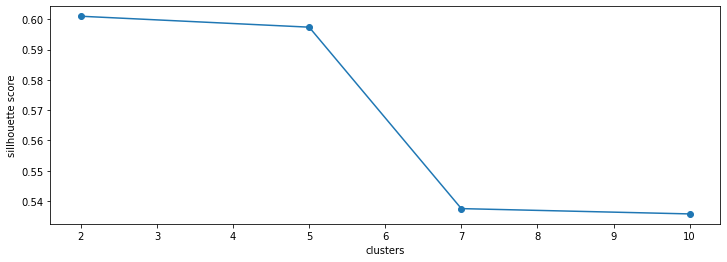

In [209]:
plt.figure(figsize=(12, 4))
plt.scatter(k_list, sil_scores)
plt.plot(k_list, sil_scores)
plt.xlabel("clusters")
plt.ylabel("sillhouette score")
plt.show()

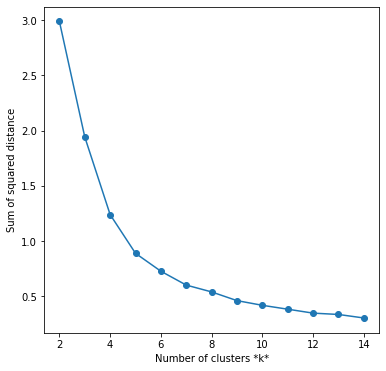

In [210]:
# Run the Kmeans algorithm and get the index of data points clusters
sse = []
list_k = list(range(2, 15))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(doc2vec_df)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

In [84]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [220]:
X = doc2vec_model.drop('title', axis=1).values

In [221]:
#doc2vec_model= doc2vec_model.reset_index(drop= True, inplace=True)

In [222]:
# y_kmeans = k_means_model.predict(doc2vec_model.drop('title', axis=1))

In [223]:
labels = k_means_model.labels_.tolist()

In [224]:
labelst = data['Review Type (pos or neg)'].apply(lambda x: 0 if x.lower().split(' ')[0] == 'negative' else 1)
print(labelst)

0      1
1      1
2      1
3      1
4      1
      ..
244    0
245    0
246    0
247    0
248    0
Name: Review Type (pos or neg), Length: 249, dtype: int64


In [225]:

def get_cluster_scatter_plot(X, kmeans_model, kmeans_labels, title):
    pca = PCA(n_components=2).fit(X)
    datapoint = pca.transform(X)

    plt.figure(figsize=(10, 6))
    label1 = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000000']#, "#0000FF"]
    color = [label1[i] for i in kmeans_labels]
    #print(color)
    scatter = plt.scatter(datapoint[:, 0], datapoint[:, 1], c=color)

    centroids = kmeans_model.cluster_centers_
    centroidpoint = pca.transform(centroids)
    plt.scatter(centroidpoint[:, 0], centroidpoint[:, 1], marker='^', s=150, c='#000000')
    plt.title(title + ' PCA Cluster Plot')
   
    plt.show()

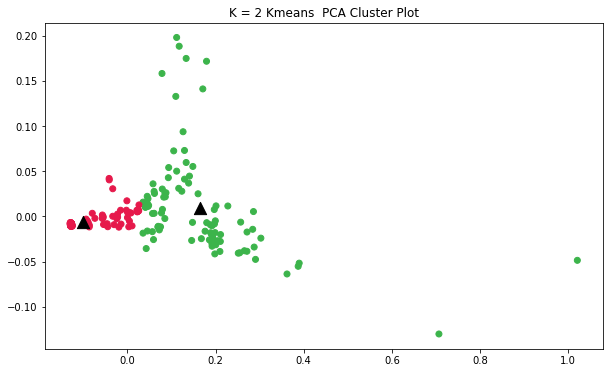

In [226]:
get_cluster_scatter_plot(X, k_means_model, labels, 'K = 2 Kmeans ')

In [227]:
pca = PCA(2)

In [228]:
traindata = pd.DataFrame(pca.fit_transform(X),columns=["x","y"])

In [229]:
traindata = traindata.assign(cluster = k_means_model.labels_)

In [230]:
traindata =traindata.assign(truelabel = labelst)

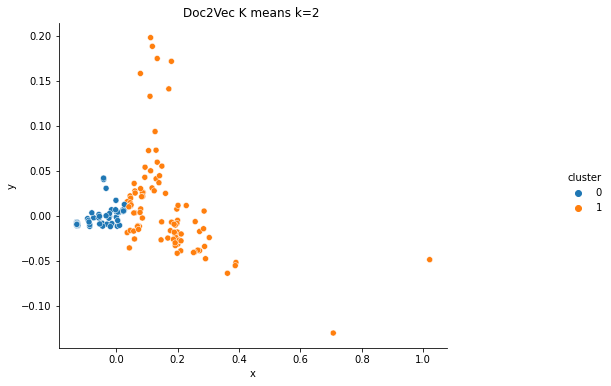

In [233]:
g = sns.pairplot(x_vars="x", y_vars="y", hue="cluster", data = traindata)
plt.title("Doc2Vec K means k=2 ")
g.fig.set_size_inches(10, 6)

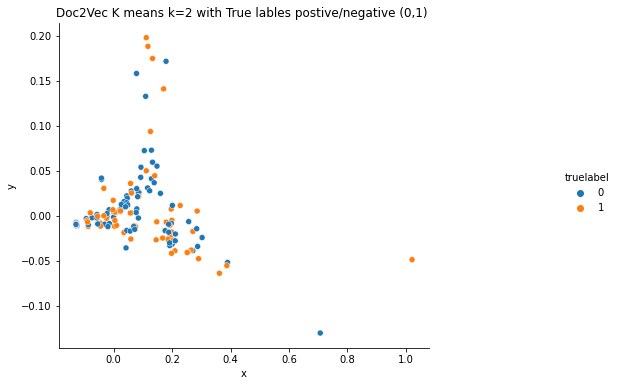

In [234]:
g = sns.pairplot(x_vars="x", y_vars="y", hue="truelabel", data = traindata)
plt.title("Doc2Vec K means k=2 with True lables postive/negative (0,1) ")
g.fig.set_size_inches(10, 6)

In [98]:
from sklearn.metrics import homogeneity_score


In [99]:
kmeans = KMeans(n_clusters=2)
  
# Training the clustering model
kmeans.fit(X)
  
# Storing the predicted Clustering labels
y = kmeans.predict(X)

# Evaluating the performance
homogeneity_score(labelst, y)

5.923137735073823e-06

In [100]:
datak2= data[["Review Type (pos or neg)", "Movie Title"]].copy()

In [101]:
datak2 = datak2.assign(cluster = y)

In [102]:
datak2.groupby(["cluster","Review Type (pos or neg)"])["Movie Title"].count().reset_index(name ="Count")

,cluster,Review Type (pos or neg),Count
0,0,Negative,42
1,0,Positive,42
2,1,Negative,83
3,1,Positive,82


In [103]:
pip install scikit-plot

In [104]:
import scikitplot as skplt

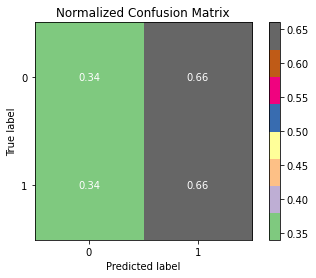

In [107]:
skplt.metrics.plot_confusion_matrix(labelst,y,normalize=True, cmap ='Accent' )

In [108]:
from sklearn.metrics import r2_score

r2_score(labelst,y)

-1.008064516129032

In [109]:
from sklearn.metrics import silhouette_score

In [110]:
silhouette_score(X, labels)

0.61978465

# dbscan CUSTERING

In [248]:
X= tfidf_matrix.values


In [249]:
labels = k_tfidfmeans_model.labels_.tolist()

In [113]:
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt

In [114]:
neighbors = NearestNeighbors(n_neighbors=20)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

In [115]:
distances[:5]

array([[0.        , 1.11395933, 1.12264338, 1.15372693, 1.15450589,
        1.16137464, 1.17842418, 1.21028717, 1.2283876 , 1.23484225,
        1.36507116, 1.3673852 , 1.36756529, 1.36843672, 1.37153298,
        1.3722506 , 1.37229271, 1.37332648, 1.37423395, 1.37442042],
       [0.        , 1.14560036, 1.17312842, 1.19145463, 1.19900007,
        1.20434869, 1.2283876 , 1.24726068, 1.24813184, 1.24969415,
        1.33440623, 1.34068167, 1.3429919 , 1.34877542, 1.35169045,
        1.3537268 , 1.35438114, 1.35486938, 1.3558635 , 1.3624262 ],
       [0.        , 0.99370278, 1.00420443, 1.1241834 , 1.12424957,
        1.13103644, 1.13365507, 1.16137464, 1.17312842, 1.18305298,
        1.31669185, 1.32118073, 1.33525362, 1.34095213, 1.34113458,
        1.34163724, 1.34696224, 1.34784189, 1.34897589, 1.35038375],
       [0.        , 0.93126601, 0.99370278, 1.10212359, 1.11215228,
        1.12264338, 1.1258336 , 1.12710702, 1.1730345 , 1.19145463,
        1.33050957, 1.3407562 , 1.34113563, 1

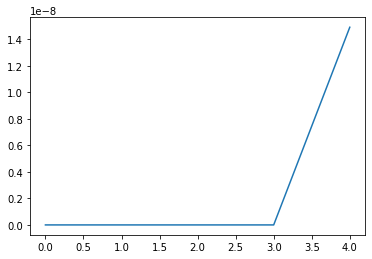

In [116]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances[:5])

In [117]:
np.sort(distances, axis=0)[:10]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.49011612e-08, 1.49011612e-08, 1.68794300e-01, 1.68794300e-01,
       1.73667279e-01, 1.73667279e-01])

In [118]:
X[:,1:3]. shape

(249, 2)

In [119]:
pca = PCA(n_components=2).fit(X)
datapoint = pca.transform(X)

In [122]:
from sklearn.preprocessing import StandardScaler

In [123]:
def dbscan(X, eps, min_samples):
    ss = StandardScaler()
    X = ss.fit_transform(X)
    db = DBSCAN(eps=eps, min_samples=min_samples)
    db.fit(X)
    y_pred = db.fit_predict(X)
    plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='Paired')
    plt.title("DBSCAN")

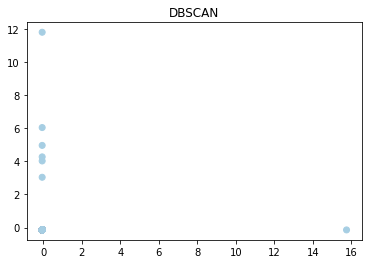

In [124]:
dbscan(X, eps=2.10734243e-08, min_samples=2)

In [250]:
db = DBSCAN(eps= 2.10734243e-08, min_samples=2)
db = db.fit(X)

In [128]:
# from sklearn.preprocessing import StandardScaler
# # scaling the data
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

Text(0.5, 1.0, 'Clusters determined by DBSCAN (eps= 2.10734243e-08')

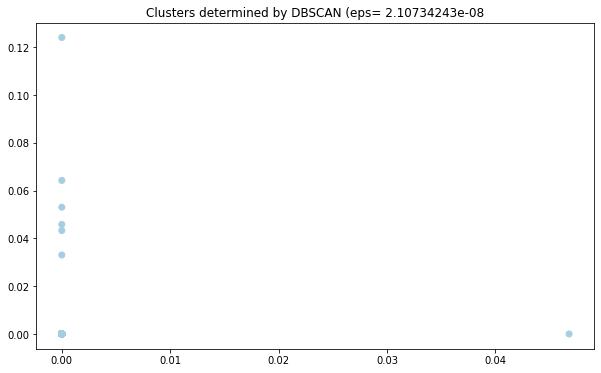

In [251]:
y_pred = db.fit_predict(X)
plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='Paired')
plt.title("Clusters determined by DBSCAN (eps= 2.10734243e-08")

Text(0, 0.5, 'Distance')

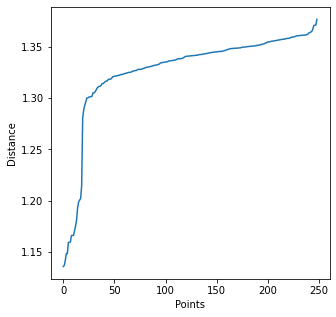

In [131]:
from sklearn.neighbors import NearestNeighbors
nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(X)
distances, indices = neighbors.kneighbors(X)
distances = np.sort(distances[:,10], axis=0)
fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")

In [132]:
pip install kneed

1.3767957994778235


<Figure size 360x360 with 0 Axes>

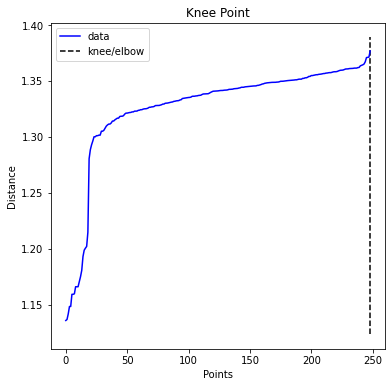

In [133]:
from kneed import KneeLocator
i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')
fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")

print(distances[knee.knee])

## **AgglomerativeClustering**

In [134]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit_predict(tfidf_matrix)


In [135]:

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [136]:
# plot_dendrogram(model, truncate_mode="level", p=3)

In [137]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [138]:
clust_dist = linkage(doc2vec_df, 'average', 'euclidean')

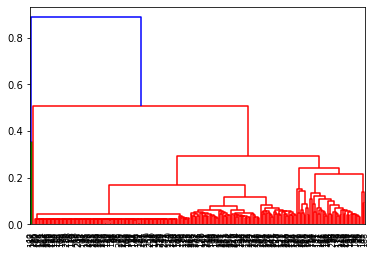

In [139]:
DF = dendrogram(
    clust_dist,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)

In [235]:
agglo = AgglomerativeClustering(n_clusters=2, linkage='ward').fit(X)



# g = sns.pairplot(x_vars="SepalLength", y_vars="SepalWidth", hue="cluster", data = traindata)
# g.fig.set_size_inches(14, 6)

In [236]:
pca = PCA(2)

In [237]:
traindata = pd.DataFrame(pca.fit_transform(X),columns=["x","y"])

In [238]:
traindata = traindata.assign(cluster = agglo.labels_)

In [239]:
traindata =traindata.assign(truelabel = labelst)

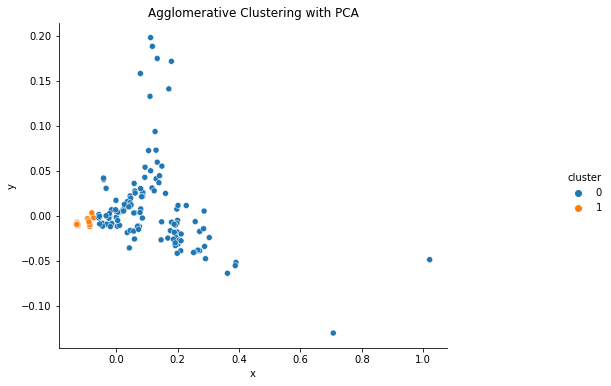

In [240]:
g = sns.pairplot(x_vars="x", y_vars="y", hue="cluster", data = traindata )
plt.title("Agglomerative Clustering with PCA")
g.fig.set_size_inches(10, 6)

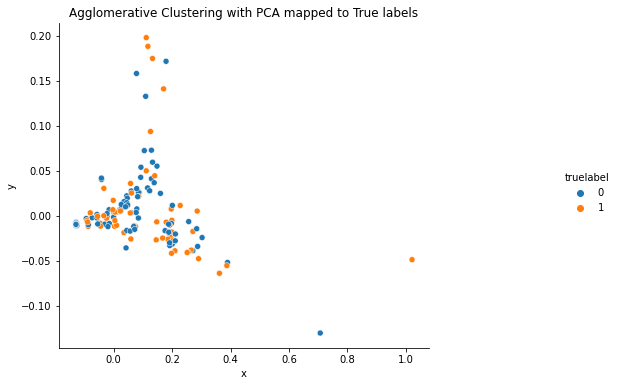

In [241]:
g = sns.pairplot(x_vars="x", y_vars="y", hue="truelabel", data = traindata)
plt.title("Agglomerative Clustering with PCA mapped to True labels")
g.fig.set_size_inches(10, 6)

In [242]:
yh= agglo.fit_predict(X)

In [244]:
X

array([[ 5.2850152e-04, -1.3630840e-03, -1.1174337e-04, ...,
        -7.0318795e-04,  7.4080826e-04,  1.6190406e-03],
       [-1.0966726e-03, -1.2290240e-03,  1.3701706e-03, ...,
         1.8040288e-05,  9.1560686e-04,  1.1680721e-03],
       [-1.1945226e-02, -1.4523733e-02, -7.0945709e-03, ...,
        -1.0970437e-02, -5.3226613e-03,  2.2027858e-02],
       ...,
       [-1.4985361e-02, -1.4884284e-02, -1.2027024e-02, ...,
        -1.0154650e-02,  6.2710466e-04,  2.3799440e-02],
       [-7.5270920e-03, -1.3207346e-02, -1.0380486e-02, ...,
        -1.0345874e-02, -4.7411839e-03,  1.9566322e-02],
       [ 6.7935413e-04, -1.2246023e-03,  4.3595585e-04, ...,
        -1.3372276e-03,  1.1074893e-03,  1.6168633e-03]], dtype=float32)

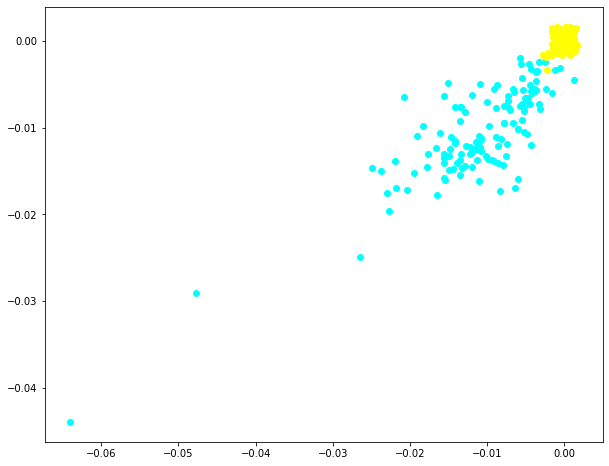

In [243]:
plt.scatter(X[yh== 0,0], X[yh == 0,1], c ="cyan")
plt.scatter(X[yh== 1,0], X[yh == 1,1], c ="yellow")

In [149]:
model = Word2Vec(processed_text, size=100, window=3, min_count=2, workers=4)

#join all processed DSI words into single list
processed_text_w2v=[]
for i in processed_text:
    for k in i:
        processed_text_w2v.append(k)
 


In [150]:
model.wv["frozen"]

array([-0.10504765, -0.0115459 ,  0.49555305, -0.15767667, -0.11300877,
       -0.21951772, -0.44013608,  0.00917728, -0.26463437, -0.07242338,
        0.08047659,  0.03406335,  0.24201512, -0.06119772,  0.11088957,
        0.13945134,  0.3520395 , -0.46299416, -0.2410425 , -0.34620455,
        0.33692142, -0.18558516, -0.0173898 , -0.01939142, -0.18359819,
        0.4806267 , -0.16366123,  0.5994198 , -0.24149987,  0.35055125,
        0.2573937 ,  0.47757354,  0.11004511,  0.08343418,  0.02908366,
       -0.24794437,  0.18481845,  0.24905123, -0.35843572,  0.24456213,
        0.22599728, -0.04412926,  0.18848027,  0.12039465, -0.44037956,
       -0.36824486, -0.38295498, -0.16267054,  0.24640177,  0.15238218,
        0.33844906, -0.00464742,  0.13322856, -0.40293705, -0.17464508,
        0.46543786, -0.17181872,  0.20380731,  0.1762274 , -0.09515706,
       -0.03000243, -0.03794599, -0.52445245, -0.6451008 ,  0.0974737 ,
       -0.13441268, -0.3722889 ,  0.28592175,  0.1113884 ,  0.05

In [151]:
#obtian all the unique words from DSI
w2v_words=list(set(processed_text_w2v))

#can also use the get_feature_names() from TFIDF to get the list of words
#w2v_words=Tfidf.get_feature_names()

#empty dictionary to store words with vectors
w2v_vectors={}

#for loop to obtain weights for each word
for i in w2v_words:
    temp_vec=model_w2v.wv[i]
    w2v_vectors[i]=temp_vec

#create a final dataframe to view word vectors
w2v_df=pd.DataFrame(w2v_vectors).transpose()

In [152]:
w2v_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
extending,-0.002128,-0.000327,0.007883,-0.005475,-0.000368,-0.003488,-0.008971,-0.001218,-0.003063,-0.001228,-0.000538,0.000547,0.005322,0.000985,0.002407,0.003054,0.004984,-0.009016,-0.005392,-0.006447,0.007943,-0.004799,-0.002160,0.000459,-0.005408,0.009415,-0.002431,0.009889,-0.005807,0.005246,0.005214,0.007065,0.002908,0.001763,0.000316,-0.004434,0.003901,0.003516,-0.004674,0.004331,...,0.001941,0.003088,-0.009017,0.003884,0.005078,-0.005900,-0.009110,0.007084,0.001846,-0.001243,0.006288,0.004763,0.000716,0.007782,-0.007724,0.001561,-0.000437,-0.003763,0.003067,-0.003170,0.002802,0.010532,-0.006107,0.009541,-0.002290,0.001092,-0.005720,-0.006576,-0.002772,-0.004174,0.001902,0.009933,-0.006348,-0.000785,0.001179,-0.002419,-0.002509,-0.000518,-0.002707,-0.004355
enjoyment,-0.001202,-0.000985,0.012878,-0.009662,-0.002272,-0.002160,-0.016270,0.001138,-0.005601,-0.001023,0.000235,0.002181,0.007029,0.001481,0.000924,0.005986,0.011892,-0.013568,-0.007794,-0.008095,0.012829,-0.007543,-0.000266,-0.000963,-0.006699,0.012782,-0.006014,0.018137,-0.008058,0.009150,0.006918,0.013541,0.004680,0.004802,0.001391,-0.010190,0.004944,0.009274,-0.010613,0.008272,...,0.002688,0.002566,-0.012580,0.005302,0.006604,-0.007370,-0.014355,0.008536,0.003212,-0.002647,0.009506,0.009391,0.000893,0.013621,-0.013361,0.000310,0.000207,-0.006300,0.004244,-0.004513,0.004016,0.018994,-0.009529,0.014275,-0.002628,-0.000018,-0.006888,-0.011783,-0.006657,-0.007456,0.000229,0.015761,-0.007681,0.000281,0.000272,-0.001691,-0.005327,-0.004328,-0.004172,-0.008032
astuteness,-0.001242,0.000012,0.000886,-0.000419,0.000179,-0.000334,-0.003471,0.000404,0.000048,0.000715,0.001055,0.000232,0.002614,-0.001520,-0.000011,0.000107,0.002217,-0.001780,-0.000087,-0.000883,0.000385,-0.002380,0.000092,0.000137,-0.000519,0.001832,-0.002397,0.002819,0.000213,0.000304,0.002898,0.001792,-0.000650,-0.000122,0.000504,-0.001693,-0.000247,0.001465,-0.001937,0.001844,...,-0.000390,0.000684,-0.002181,0.000925,0.002009,-0.001936,-0.001622,0.000596,0.000736,0.000526,0.000928,-0.000371,-0.000385,0.002912,-0.001214,-0.001318,-0.001007,-0.000757,-0.000751,-0.000405,-0.000660,0.001805,-0.002271,0.003913,-0.001227,-0.000669,0.000070,-0.003152,-0.000508,-0.002645,0.000605,0.003144,-0.000484,-0.000389,0.001441,-0.001675,-0.002038,0.000911,-0.000731,0.000178
tolerates,0.000665,0.001345,0.004410,-0.003517,-0.000219,-0.001893,-0.002638,0.000528,-0.002819,-0.001294,-0.001630,0.000225,0.002430,-0.001337,0.000372,0.003319,0.002980,-0.003508,-0.002177,-0.001036,0.004748,-0.000554,-0.001385,0.000560,-0.003502,0.002460,-0.000148,0.004786,-0.001067,0.003995,0.002398,0.003415,0.002260,0.001956,0.000697,-0.004032,0.001265,0.002587,-0.003995,0.003968,...,0.000775,0.000335,-0.004239,0.002379,0.001727,-0.003875,-0.005122,0.002664,0.001355,-0.000740,0.004209,0.003700,0.002320,0.005240,-0.004353,0.001453,-0.000730,-0.000365,0.000538,-0.000136,0.000910,0.003909,-0.001856,0.004745,-0.000445,0.001002,-0.001496,-0.004671,-0.001367,-0.002867,0.000753,0.004386,-0.004118,-0.000238,0.000078,-0.002010,-0.002397,0.000165,-0.001750,-0.003617
graduated,0.001286,0.001527,0.002076,-0.001277,-0.001362,0.000002,-0.000341,0.001027,-0.000348,-0.001749,0.000484,0.001395,0.001205,0.001310,0.000994,0.000769,0.002969,-0.001694,-0.002056,0.000326,0.001308,-0.001370,0.001117,0.000954,-0.001478,0.000575,-0.001302,0.002180,-0.002528,0.000404,0.000709,0.001587,0.001075,0.000602,0.001125,-0.001750,0.001077,0.001257,0.000221,-0.000168,...,-0.000045,0.000927,-0.001424,-0.000564,-0.000327,-0.001880,-0.003355,0.001051,-0.000908,0.000157,-0.000005,0.002445,0.000444,0.001762,0.000078,-0.001269,-0.001072,-0.000527,0.000262,0.000687,-0.000276,0.003740,-0.001895,0.000640,0.000233,-0.0

### Explore K-means clustering of word2vec matrix

In [153]:
def word2vec_with_titles(corpus, processed_text, titles, vector_size = 300):
    #function to created doc2vec matrix
    model = Word2Vec(processed_text, size=vector_size, window=3, min_count=2, workers=4)

    #join all processed DSI words into single list
    processed_text_w2v=[]
    for i in processed_text:
        for k in i:
            processed_text_w2v.append(k)
        word2vec_df=pd.DataFrame()
    #obtian all the unique words from DSI
    w2v_words=list(set(processed_text_w2v))

    #can also use the get_feature_names() from TFIDF to get the list of words
    #w2v_words=Tfidf.get_feature_names()

    #empty dictionary to store words with vectors
    w2v_vectors={}

    #for loop to obtain weights for each word
    for i in w2v_words:
        temp_vec=model_w2v.wv[i]
        w2v_vectors[i]=temp_vec

    #create a final dataframe to view word vectors
    w2v_df=pd.DataFrame(w2v_vectors).transpose()
    return w2v_df

def k_means_word2vec(w2v_df, final_processed_text,titles, k = 5):
    
    #this is a funciton to create the k_means outputs using the doc2vec matrics.  Required inputs
    #include the doc2vec matrix, and desired number of clusters.
    doc2vec_k_means=w2v_df
    
    km = KMeans(n_clusters=k, random_state =89)
    km = km.fit(doc2vec_k_means)

    clusters = km.labels_.tolist()
    
    Dictionary={'Doc Name':titles, 'Cluster':clusters,  'Text': final_processed_text}
    frame=pd.DataFrame(Dictionary, columns=['Cluster', 'Doc Name','Text'])

    print("Top terms per cluster:")
    #sort cluster centers by proximity to centroid
    order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

    terms_dict=[]


    #save the terms for each cluster and document to dictionaries.  To be used later
    #for plotting output.

    #dictionary to store terms and titles
    cluster_terms={}
    cluster_title={}


    for i in range(k):
        #print("Cluster %d:" % i),
        temp_terms=[]
        temp_titles=[]
        for ind in order_centroids[i, :10]:
            #print(' %s' % terms[ind])
            terms_dict.append(terms[ind])
            temp_terms.append(terms[ind])
        cluster_terms[i]=temp_terms

        
        #print("Cluster %d titles:" % i, end='')
        temp=frame[frame['Cluster']==i]
        for title in temp['Doc Name']:
            #print(' %s,' % title, end='')
            temp_titles.append(title)
        cluster_title[i]=temp_titles
    return km, cluster_title 



In [154]:

w2vec_model = word2vec_with_titles(final_processed_text, processed_text,titles)


In [155]:
#k_means_model, cluster_title = k_means_word2vec(w2vec_model, terms,final_processed_text, k =4)

In [156]:

km = KMeans(n_clusters=2, random_state =89)
km = km.fit(w2vec_model )

In [157]:
labels = km.labels_.tolist()

In [158]:
X= w2v_df.values

In [159]:
word2vec_with_titles

<function __main__.word2vec_with_titles>

In [160]:

def get_cluster_scatter_plot(X, kmeans_model, kmeans_labels, title):
    pca = PCA(n_components=2).fit(X)
    datapoint = pca.transform(X)

    plt.figure(figsize=(10, 6))
    #label1 = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000000']#, "#0000FF"]
    #color = [label1[i] for i in kmeans_labels]
    #print(color)
    scatter = plt.scatter(datapoint[:, 0], datapoint[:, 1], c = labels )
    centroids = kmeans_model.cluster_centers_
    centroidpoint = pca.transform(centroids)
    plt.scatter(centroidpoint[:, 0], centroidpoint[:, 1], marker='^', s=150, c='#000000')
    plt.title(title + ' PCA Cluster Plot')
    plt.show()



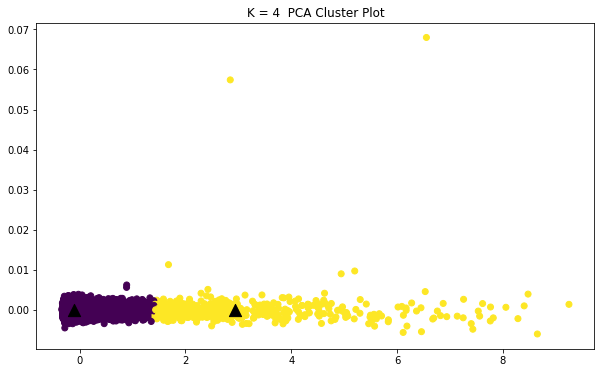

In [161]:
get_cluster_scatter_plot(X, km, labels, 'K = 4 ')

In [162]:
pip install Textblob

In [163]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity


In [164]:
data['polarity'] = data['Text'].apply(pol)
data['subjectivity'] = data['Text'].apply(sub)
data

,Doc_ID,DSI_Title,Text,Submission File Name,Student Name,Genre of Movie,Review Type (pos or neg),Movie Title,polarity,subjectivity
0,0,HAG_Doc1_Frozen2,"Parents, you can breathe a sigh of relief. Fro...",HAG_Doc1_Frozen2,HAG,Comedy,Positive,Frozen_2,0.128898,0.495021
1,1,HAG_Doc2_Frozen2,Theyre back the first Disney princesses to pe...,HAG_Doc2_Frozen2,HAG,Comedy,Positive,Frozen_2,0.153393,0.459864
2,2,HAG_Doc3_Frozen2,Released in 2013 to a record-scorching $1.29 b...,HAG_Doc3_Frozen2,HAG,Comedy,Positive,Frozen_2,0.179426,0.509472
3,3,HAG_Doc4_Frozen2,"After the colossal success of Frozen, Disneys ...",HAG_Doc4_Frozen2,HAG,Comedy,Positive,Frozen_2,0.153756,0.488910
4,4,HAG_Doc5_Frozen2,Animated adventure featuring the voices of Idi...,HAG_Doc5_Frozen2,HAG,Comedy,Positive,Frozen_2,0.160338,0.482803
...,...,...,...,...,...,...,...,...,...,...
244,245,OFZ_Doc6_PACIFICRIM,Teamwork saves the world in Guillermo del Toro...,OFZ_Doc6_PACIFICRIM,OFZ,Sci_Fi,Negative,Pacific_Rim,0.081827,0.479762
245,246,OFZ_Doc7_PACIFICRIM,If your childhood fantasy was to watch Godzill...,OFZ_Doc7_PACIFICRIM,OFZ,Sci_Fi,Negative,Pacific_Rim,0.085753,0.483472
246,247,OFZ_Doc8_PACIFICRIM,This is one of those reviews where I know I’m ...,OFZ_Doc8_PACIFICRIM,OFZ,Sci_Fi,Negative,Pacific_Rim,0.017128,0.510267
247,248,OFZ_Doc9_PACIFICRIM,Expectation can be a terrible drug to come dow...,OFZ_Doc9_PACIFICRIM,OFZ,Sci_Fi,Negative,Pacific_Rim,0.088969,0.544821


In [172]:
datagroup = data.groupby(["Movie Title"])

Text(0, 0.5, ' <-- Facts -------- Opinions --> \n subjectity')

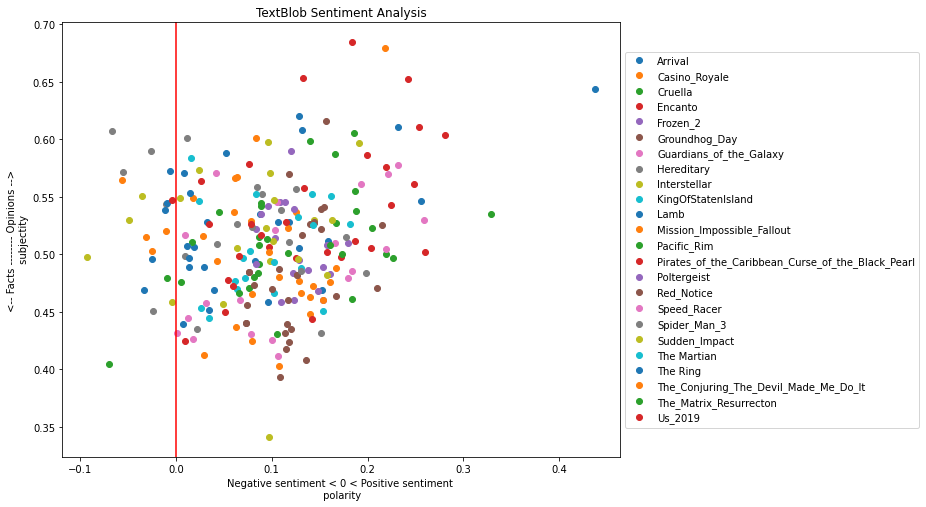

In [181]:


for name , group in datagroup:
  
    plt.plot(group["polarity"], group["subjectivity"], marker="o", linestyle="", label=name)
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5))
plt.axvline(x=0, c ='red')
plt.title("K= 6")
plt.title('TextBlob Sentiment Analysis')
plt.xlabel('Negative sentiment < 0 < Positive sentiment \n polarity')
plt.ylabel(' <-- Facts -------- Opinions --> \n subjectity')


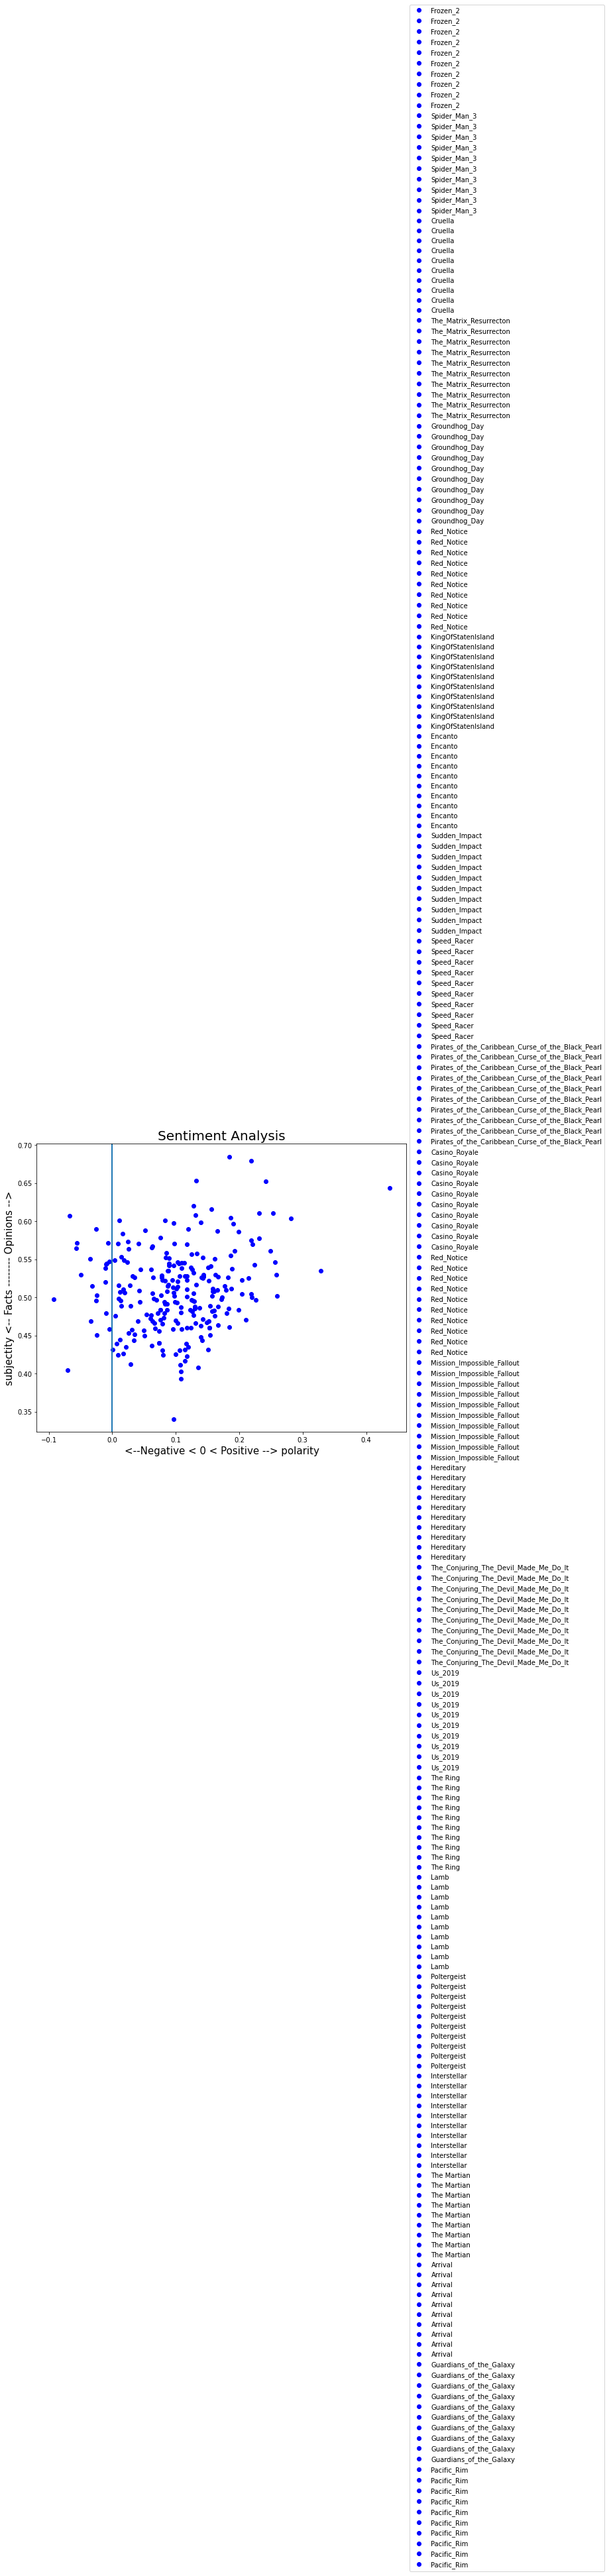

In [173]:

plt.rcParams['figure.figsize'] = [10, 8]

for index, row in enumerate(data.index):
    x = data.polarity.loc[row]
    y = data.subjectivity.loc[row]
    plt.plot(x, y, color='blue',marker="o", linestyle="", label = data["Movie Title"][index])
    #plt.text(x+.001, y+.001, data['Movie Title'][index], fontsize=10)
    
    plt.axvline(x=0)
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5))   
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<--Negative < 0 < Positive --> polarity', fontsize=15)
plt.ylabel('subjectity <-- Facts -------- Opinions -->', fontsize=15)

plt.show()

In [166]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data.Text:
    list_pieces.append(t)


In [167]:
movie_name = data["Movie Title"]

In [168]:
movie_name = list(movie_name)

In [ ]:
data["Movie Title"]=="Frozen_2"

In [ ]:
# Show the plot for all comedians
#plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):    
    #plt.subplot(3, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['Movie Title'][index])
    plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()

In [256]:
data[data['polarity']> 0].shape

(228, 10)